<a href="https://colab.research.google.com/github/reyneej/portofolio2025/blob/main/tindersentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df=pd.read_csv("tinder_google_play_reviews.csv",delimiter=",")
print(df)

Saving tinder_google_play_reviews.csv to tinder_google_play_reviews.csv
                                 reviewId           userName  \
0    1f5aecbe-8726-4659-a773-ec831c86784d     Riley Chambers   
1    bcbc9dd2-fc5a-465b-af10-25c36783e1d8         Tim Marlow   
2    a6f66d86-76d9-432e-a1bb-5d6e25807287     Husnain Farooq   
3    5bf74ec8-7069-4492-84d8-b65734a79e1c      Mauricio Dias   
4    65ecd3b4-14f7-4eac-b073-bbcf34b90859      Melissa Rosas   
..                                    ...                ...   
393  a45ec314-d628-4666-8c67-1e4f0128ada5  Cory Schlotthauer   
394  90566873-fcd6-4dda-8b1c-6abfb295f30c      A Google user   
395  d38808fb-9060-415d-a072-375ce4149522       Jason Vargas   
396  883b7a6b-6808-420e-b45d-00210562376f   surafel workshet   
397  fd3610b5-bc52-474b-b0d0-f5daaa775422            Alero T   

                                             userImage  \
0    https://play-lh.googleusercontent.com/a-/ALV-U...   
1    https://play-lh.googleusercontent.com/

In [ ]:
print ("The shape of the  data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the  data is (row, column):(398, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              398 non-null    object
 1   userName              398 non-null    object
 2   userImage             398 non-null    object
 3   content               397 non-null    object
 4   score                 398 non-null    int64 
 5   thumbsUpCount         398 non-null    int64 
 6   reviewCreatedVersion  341 non-null    object
 7   at                    398 non-null    object
 8   replyContent          310 non-null    object
 9   repliedAt             310 non-null    object
 10  appVersion            341 non-null    object
dtypes: int64(2), object(9)
memory usage: 34.3+ KB
None


In [ ]:
df.head()

reviewId        userName  \
0  1f5aecbe-8726-4659-a773-ec831c86784d  Riley Chambers   
1  bcbc9dd2-fc5a-465b-af10-25c36783e1d8      Tim Marlow   
2  a6f66d86-76d9-432e-a1bb-5d6e25807287  Husnain Farooq   
3  5bf74ec8-7069-4492-84d8-b65734a79e1c   Mauricio Dias   
4  65ecd3b4-14f7-4eac-b073-bbcf34b90859   Melissa Rosas   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0  I literally just made my account and it band m...      1              0   
1  I was on this app paid for 6 months the same d...      1              0   
2                                              Worst      1              0   
3  I adquire gold however does not like anyone an...      1              0   
4            very discreet and a lot beautiful girls      5              0   

  reviewCreatedVersion                   at  \
0               13.6.1  2024-03-22 00:18:27   
1               15.4.0  2024-03-22 00:09:42   
2                  NaN  2024-03-22 00:05:20   
3               15.4.0  2024-03-21 23:58:33   
4               15.4.0  2024-03-21 23:52:21   

                                        replyContent            repliedAt  \
0  Members have to be at least 18 years old to us...  2024-03-22 00:47:41   
1  Thanks for reaching out. Sorry to hear you’re ...  2024-03-22 06:49:35   
2                                                NaN                  NaN   
3  Sorry to hear you’re having a negative experie...  2024-03-22 00:47:38   
4  Thank you for your amazing feedback! We are de...  2024-03-22 00:47:07   

  appVersion  
0     13.6.1  
1     15.4.0  
2        NaN  
3     15.4.0  
4     15.4.0

In [ ]:
#Creating a copy
process_df=df.copy()

#Checking for null values
process_df.isnull().sum()

reviewId                 0
userName                 0
userImage                0
content                  1
score                    0
thumbsUpCount            0
reviewCreatedVersion    57
at                       0
replyContent            88
repliedAt               88
appVersion              57
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64

In [ ]:
#Figuring out the distribution of categories
df['score'].value_counts()

1    175
5     41
2     28
3     10
4      9
Name: score, dtype: int64

In [ ]:
def f(row):

    '''This function returns sentiment value based on the score ratings from the user'''

    if row['score'] == 3:
        val = 'Neutral'
    elif row['score'] == 1 or row['score'] == 2:
        val = 'Negative'
    elif row['score'] == 4 or row['score'] == 5:
        val = 'Positive'
    else:
        val = -1
    return val

In [ ]:
df['sentiment'] = df.apply(f, axis=1)
df.head()

reviewId        userName  \
0  1f5aecbe-8726-4659-a773-ec831c86784d  Riley Chambers   
1  bcbc9dd2-fc5a-465b-af10-25c36783e1d8      Tim Marlow   
3  5bf74ec8-7069-4492-84d8-b65734a79e1c   Mauricio Dias   
4  65ecd3b4-14f7-4eac-b073-bbcf34b90859   Melissa Rosas   
5  048f3632-badf-42b9-a46e-a692ac86403d  Andrew Hartman   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   
5  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0  I literally just made my account and it band m...      1              0   
1  I was on this app paid for 6 months the same d...      1              0   
3  I adquire gold however does not like anyone an...      1              0   
4            very discreet and a lot beautiful girls      5              0   
5  It's a scam. I paid for a week subscription. T...      1              0   

  reviewCreatedVersion                   at  \
0               13.6.1  2024-03-22 00:18:27   
1               15.4.0  2024-03-22 00:09:42   
3               15.4.0  2024-03-21 23:58:33   
4               15.4.0  2024-03-21 23:52:21   
5               15.4.0  2024-03-21 23:52:12   

                                        replyContent            repliedAt  \
0  Members have to be at least 18 years old to us...  2024-03-22 00:47:41   
1  Thanks for reaching out. Sorry to hear you’re ...  2024-03-22 06:49:35   
3  Sorry to hear you’re having a negative experie...  2024-03-22 00:47:38   
4  Thank you for your amazing feedback! We are de...  2024-03-22 00:47:07   
5  We’re sorry to hear about this. If you need he...  2024-03-22 23:47:51   

  appVersion sentiment  
0     13.6.1  Negative  
1     15.4.0  Negative  
3     15.4.0  Negative  
4     15.4.0  Positive  
5     15.4.0  Negative

In [ ]:
df['sentiment'].value_counts()

Negative    203
Positive     50
Neutral      10
Name: sentiment, dtype: int64

In [ ]:
#Removing unnecessary columns
df=df.drop(['userName'], axis=1)
#Creating a copy
clean_df=df.copy()

In [ ]:
import re
def df_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['content']=df['content'].apply(lambda x:df_cleaning(x))
df.head()

reviewId  \
0  1f5aecbe-8726-4659-a773-ec831c86784d   
1  bcbc9dd2-fc5a-465b-af10-25c36783e1d8   
3  5bf74ec8-7069-4492-84d8-b65734a79e1c   
4  65ecd3b4-14f7-4eac-b073-bbcf34b90859   
5  048f3632-badf-42b9-a46e-a692ac86403d   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   
5  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0  i literally just made my account and it band m...      1              0   
1  i was on this app paid for  months the same da...      1              0   
3  i adquire gold however does not like anyone an...      1              0   
4            very discreet and a lot beautiful girls      5              0   
5  its a scam i paid for a week subscription the ...      1              0   

  reviewCreatedVersion                   at  \
0               13.6.1  2024-03-22 00:18:27   
1               15.4.0  2024-03-22 00:09:42   
3               15.4.0  2024-03-21 23:58:33   
4               15.4.0  2024-03-21 23:52:21   
5               15.4.0  2024-03-21 23:52:12   

                                        replyContent            repliedAt  \
0  Members have to be at least 18 years old to us...  2024-03-22 00:47:41   
1  Thanks for reaching out. Sorry to hear you’re ...  2024-03-22 06:49:35   
3  Sorry to hear you’re having a negative experie...  2024-03-22 00:47:38   
4  Thank you for your amazing feedback! We are de...  2024-03-22 00:47:07   
5  We’re sorry to hear about this. If you need he...  2024-03-22 23:47:51   

  appVersion sentiment  
0     13.6.1  Negative  
1     15.4.0  Negative  
3     15.4.0  Negative  
4     15.4.0  Positive  
5     15.4.0  Negative

In [ ]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each',
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above',
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't",
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from',
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs',
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

reviewId  \
0  1f5aecbe-8726-4659-a773-ec831c86784d   
1  bcbc9dd2-fc5a-465b-af10-25c36783e1d8   
3  5bf74ec8-7069-4492-84d8-b65734a79e1c   
4  65ecd3b4-14f7-4eac-b073-bbcf34b90859   
5  048f3632-badf-42b9-a46e-a692ac86403d   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   
5  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0  literally made account band no reason nothing ...      1              0   
1    app paid months day banned dont know waste time      1              0   
3  adquire gold however not like anyone show de m...      1              0   
4                       discreet lot beautiful girls      5              0   
5  scam paid week subscription whole supposedly r...      1              0   

  reviewCreatedVersion                   at  \
0               13.6.1  2024-03-22 00:18:27   
1               15.4.0  2024-03-22 00:09:42   
3               15.4.0  2024-03-21 23:58:33   
4               15.4.0  2024-03-21 23:52:21   
5               15.4.0  2024-03-21 23:52:12   

                                        replyContent            repliedAt  \
0  Members have to be at least 18 years old to us...  2024-03-22 00:47:41   
1  Thanks for reaching out. Sorry to hear you’re ...  2024-03-22 06:49:35   
3  Sorry to hear you’re having a negative experie...  2024-03-22 00:47:38   
4  Thank you for your amazing feedback! We are de...  2024-03-22 00:47:07   
5  We’re sorry to hear about this. If you need he...  2024-03-22 23:47:51   

  appVersion sentiment  
0     13.6.1  Negative  
1     15.4.0  Negative  
3     15.4.0  Negative  
4     15.4.0  Positive  
5     15.4.0  Negative

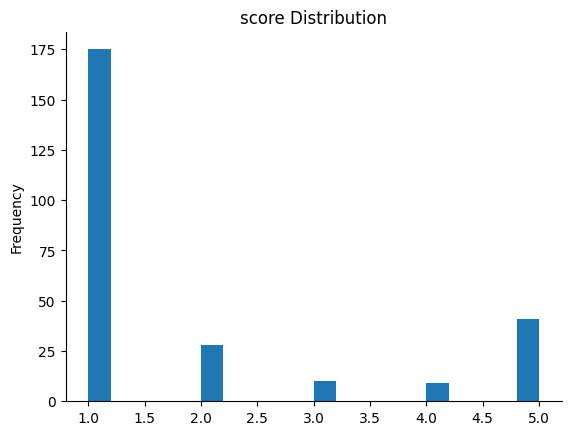

In [ ]:
# @title score Distribution

from matplotlib import pyplot as plt
df['score'].plot(kind='hist', bins=20, title='score Distribution')
plt.gca().spines[['top', 'right',]].set_visible(False)

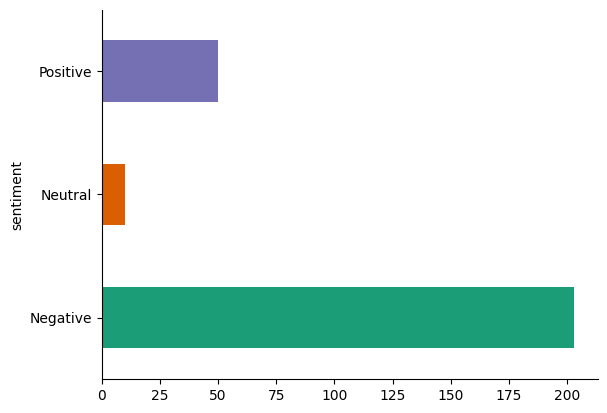

In [ ]:
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'),)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Other miscellaneous libraries
from scipy import interp
from itertools import cycle
import cufflinks as cf
from collections import defaultdict
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
import nltk
#Filtering data
df_pos = df[df["sentiment"]=='Positive'].dropna()
df_neu = df[df["sentiment"]=='Neutral'].dropna()
df_neg = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive content ##
freq_dict = defaultdict(int)
for sent in df_pos["content"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral content ##
freq_dict = defaultdict(int)
for sent in df_neu["content"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative content ##
freq_dict = defaultdict(int)
for sent in df_neg["content"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

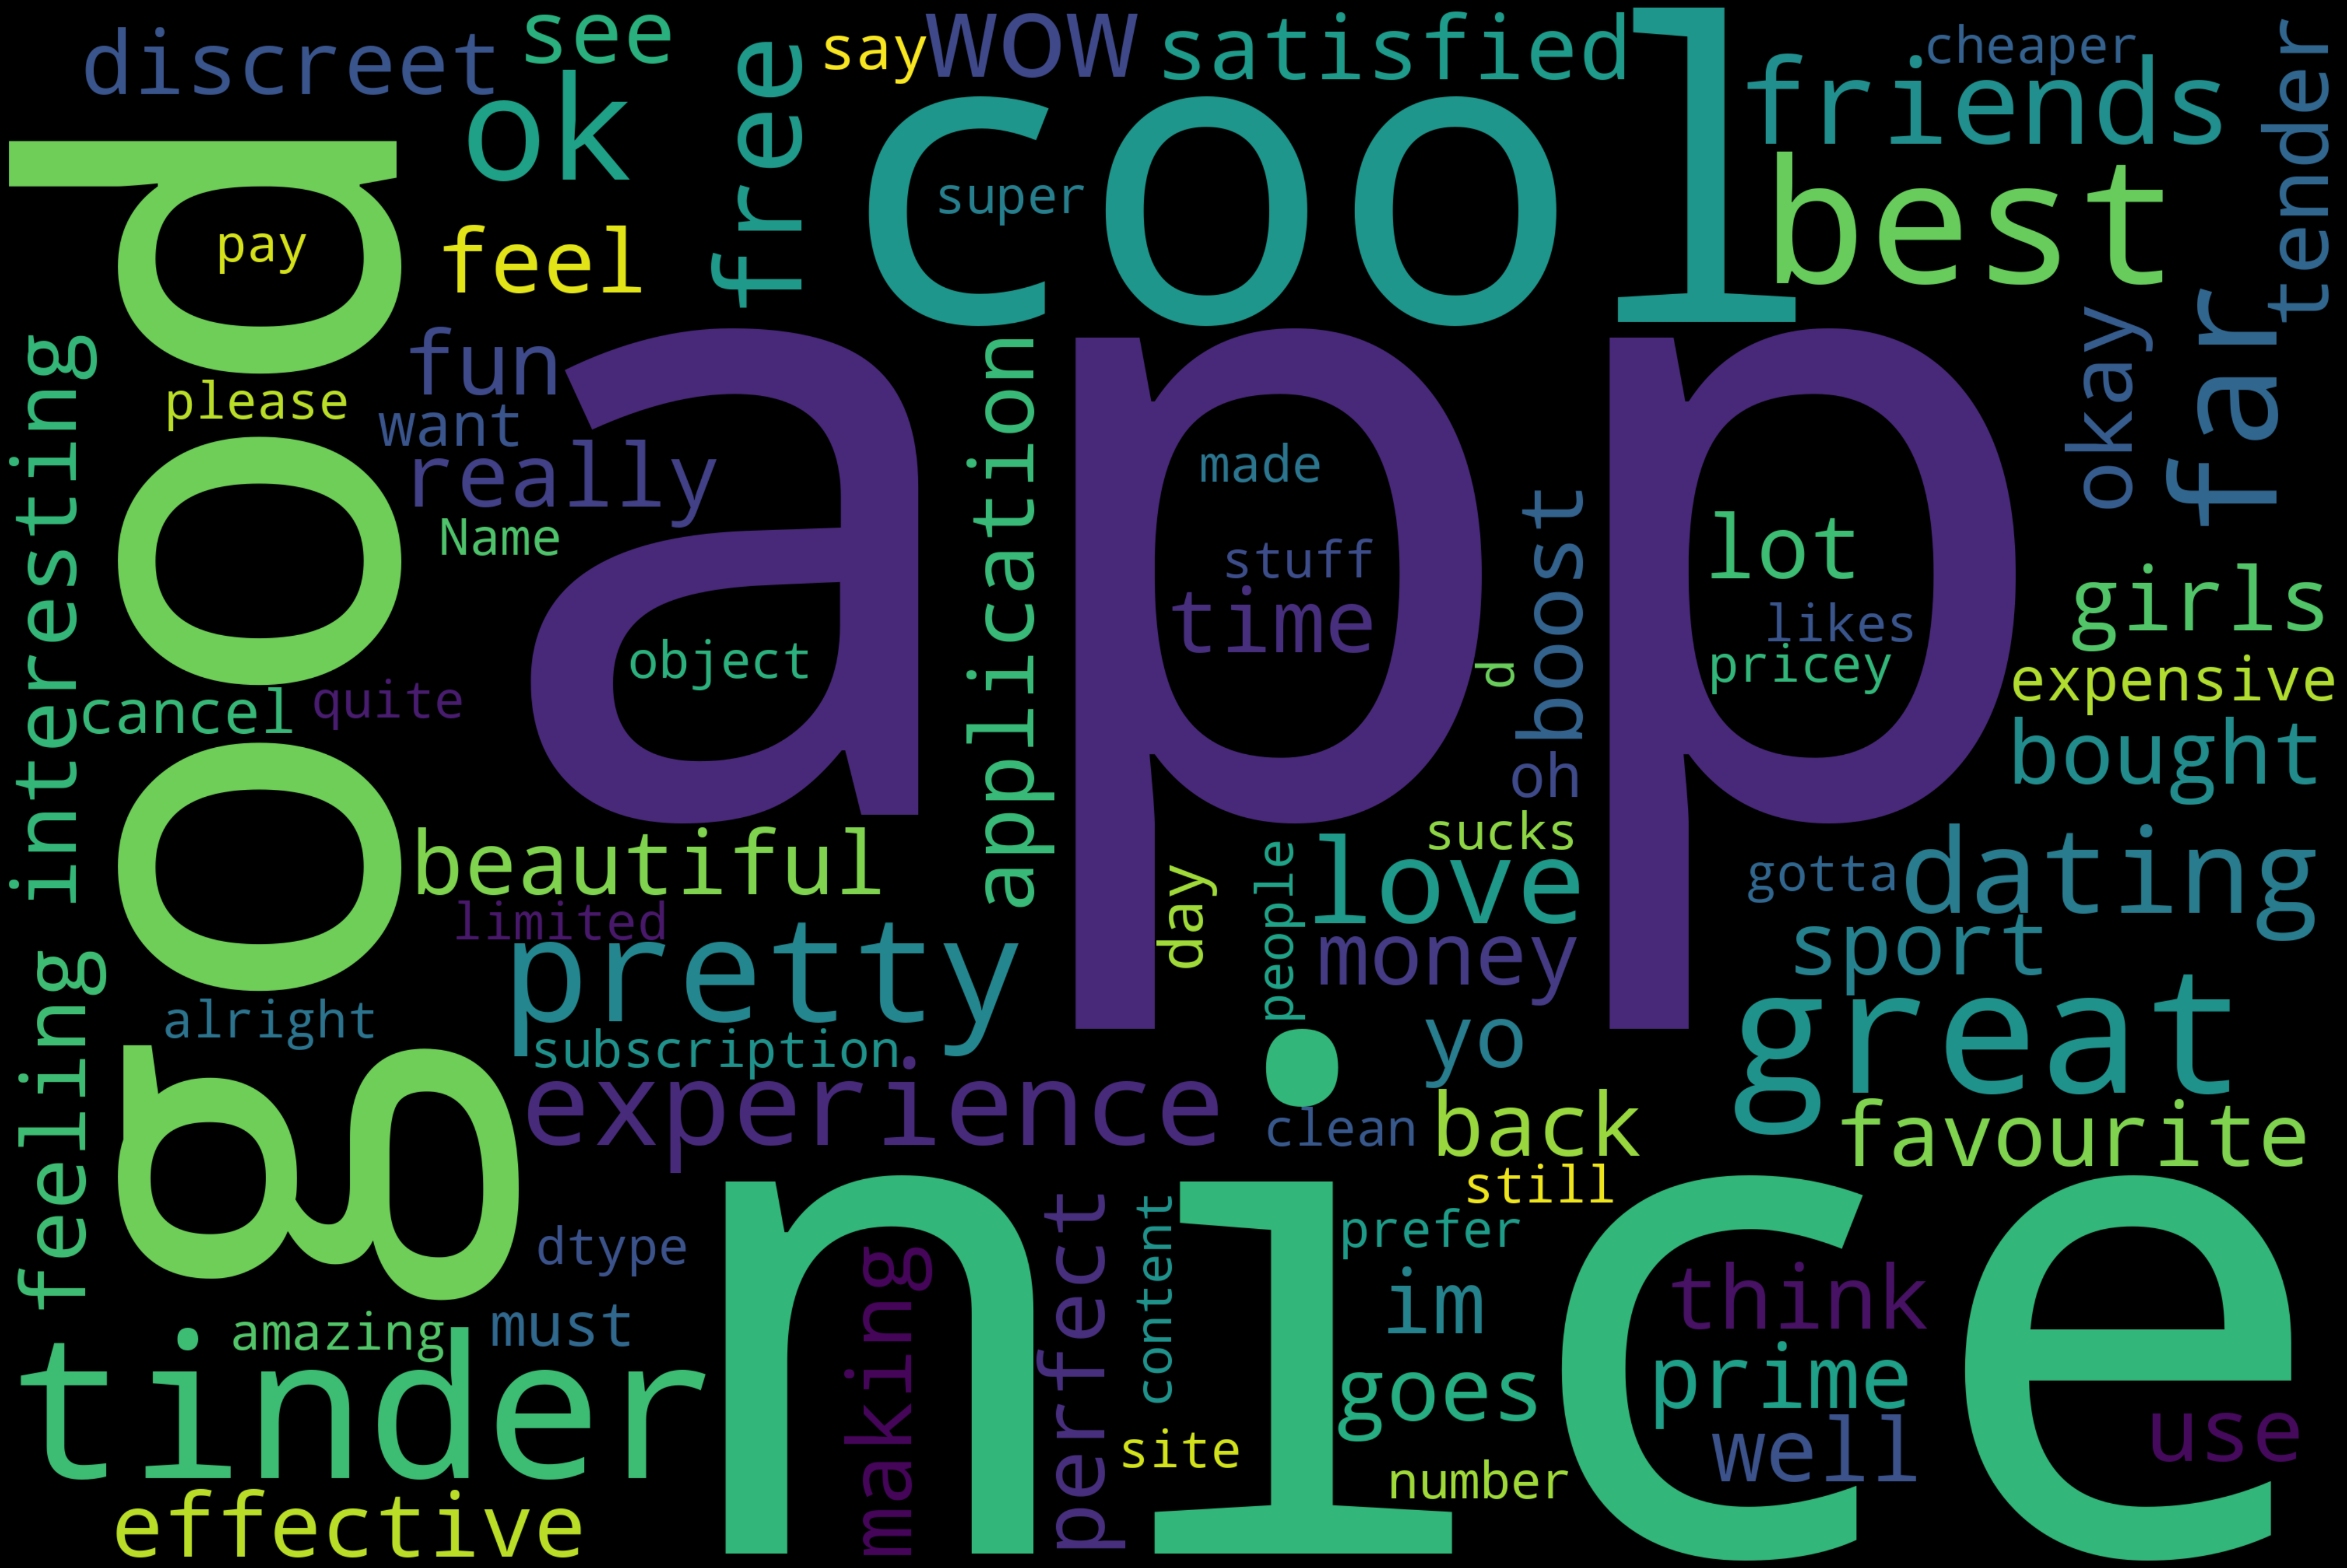

In [ ]:
text = df_pos["content"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

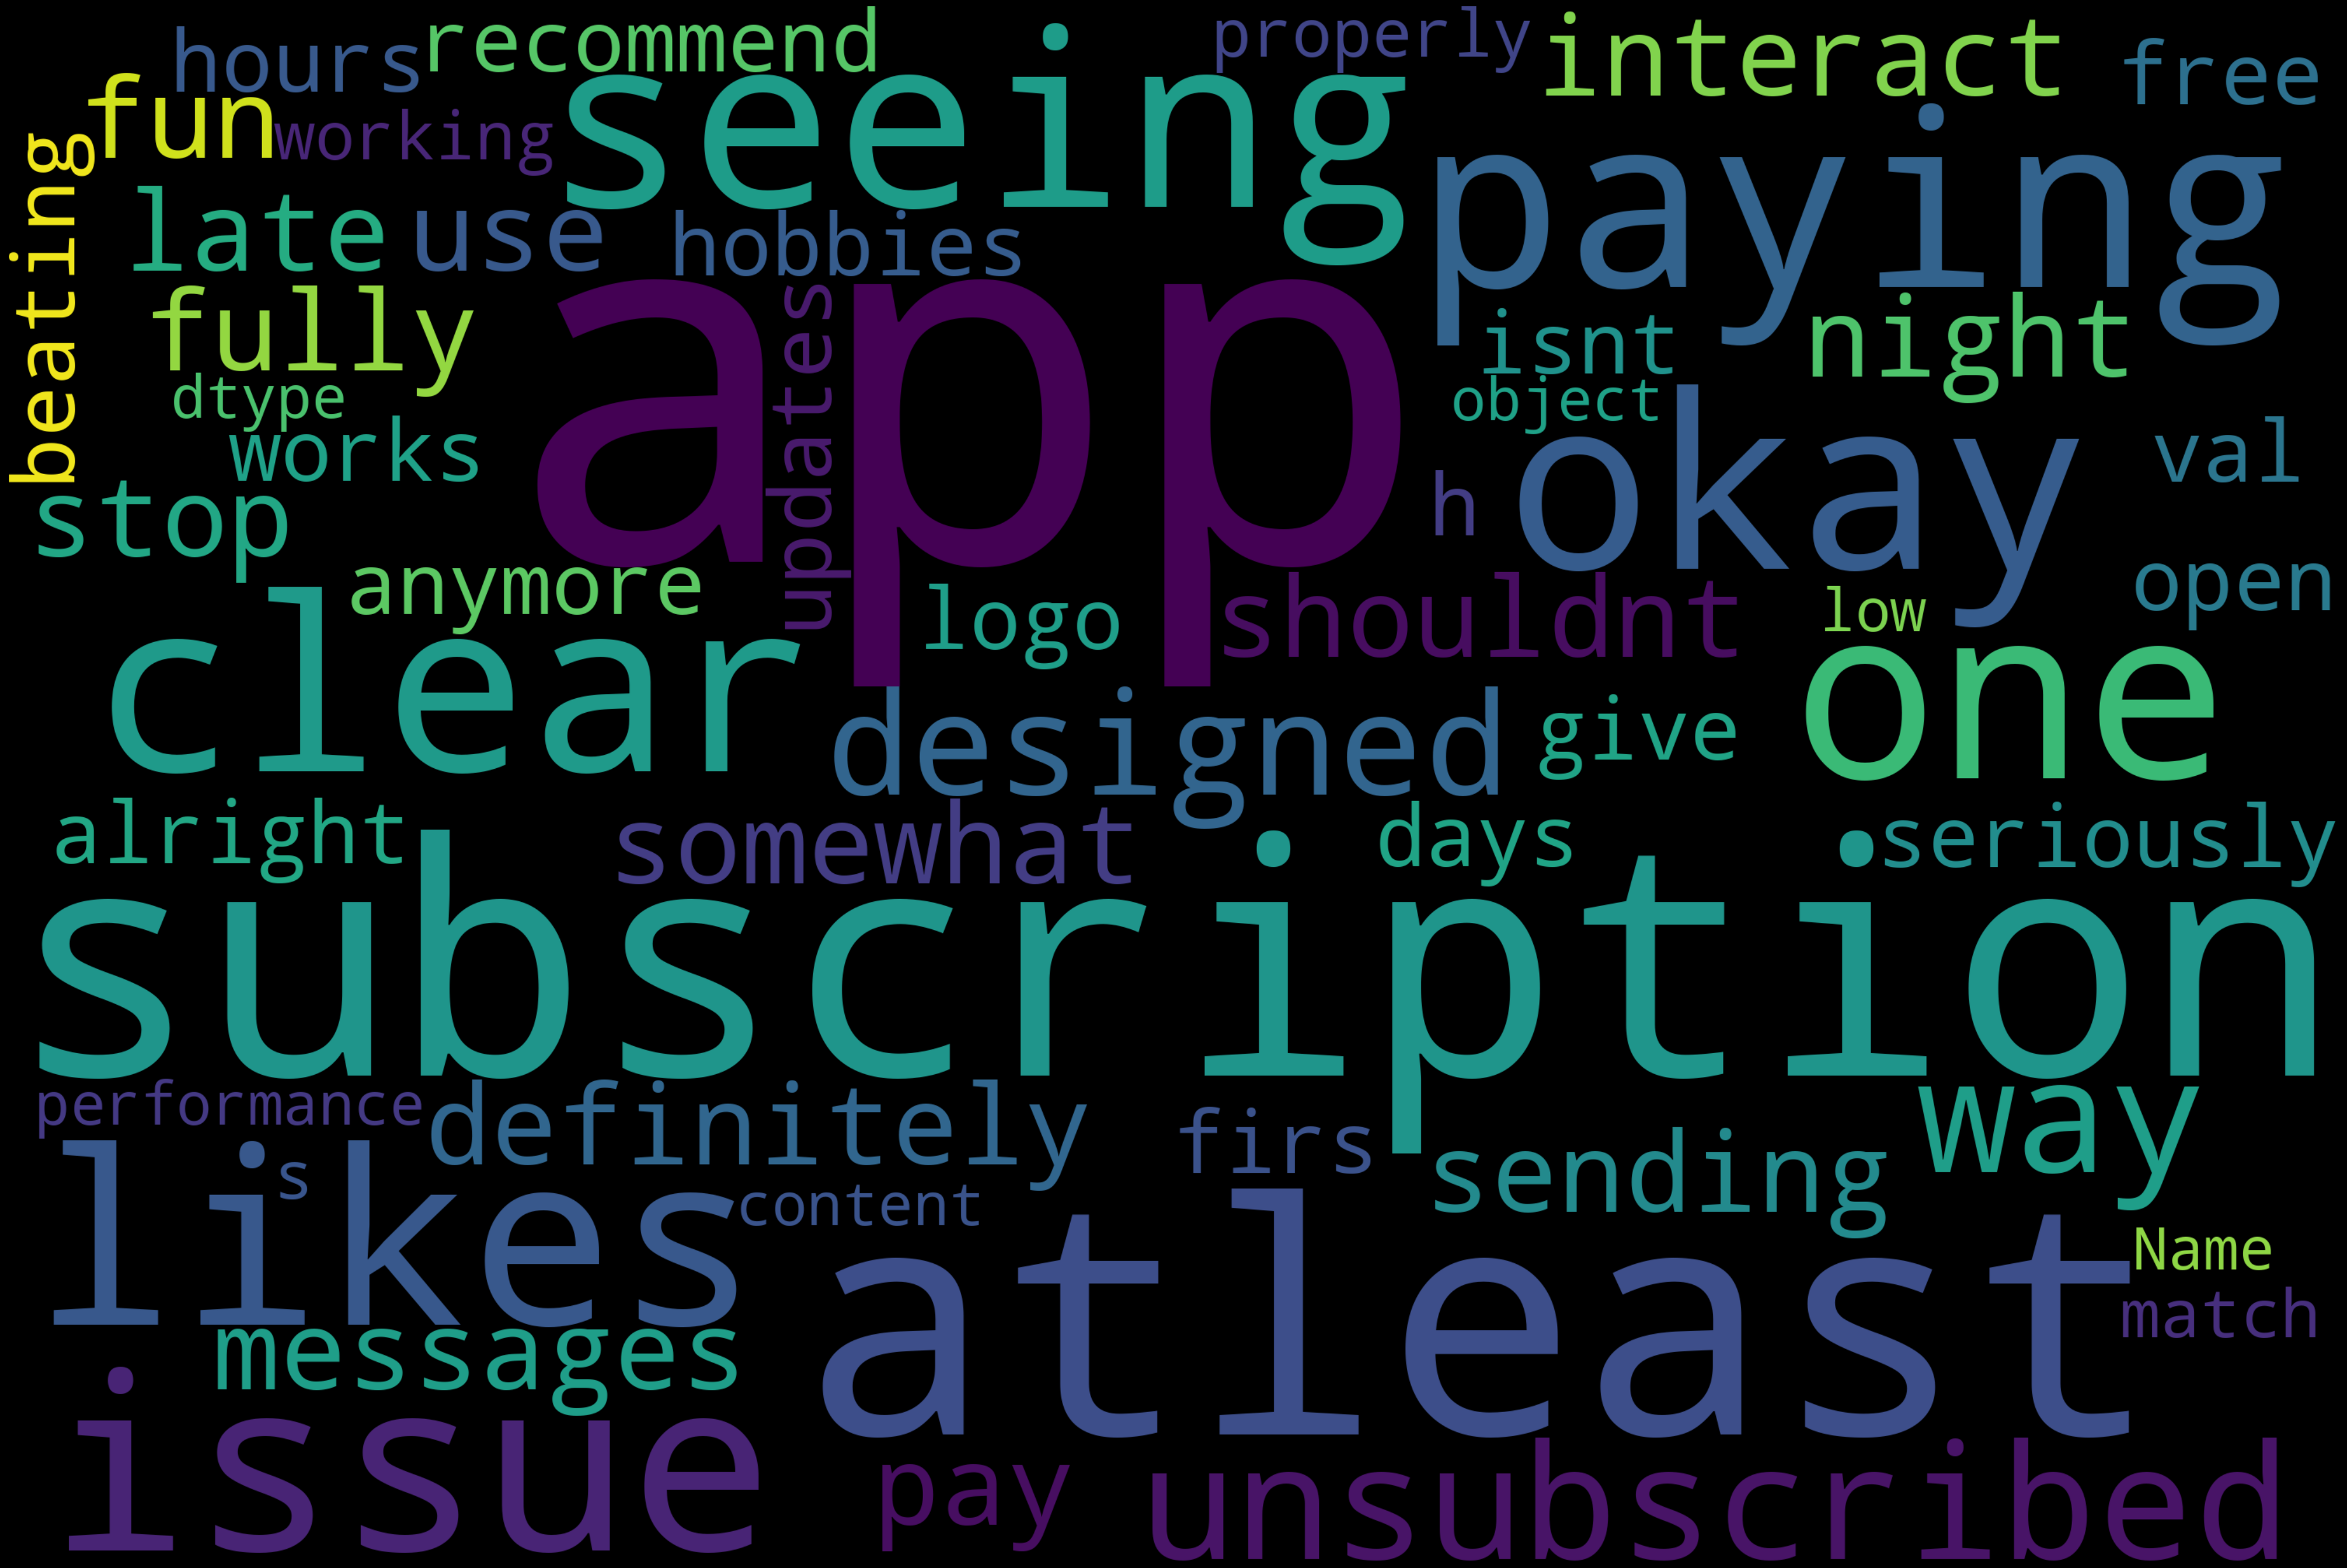

In [ ]:
text = df_neu["content"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

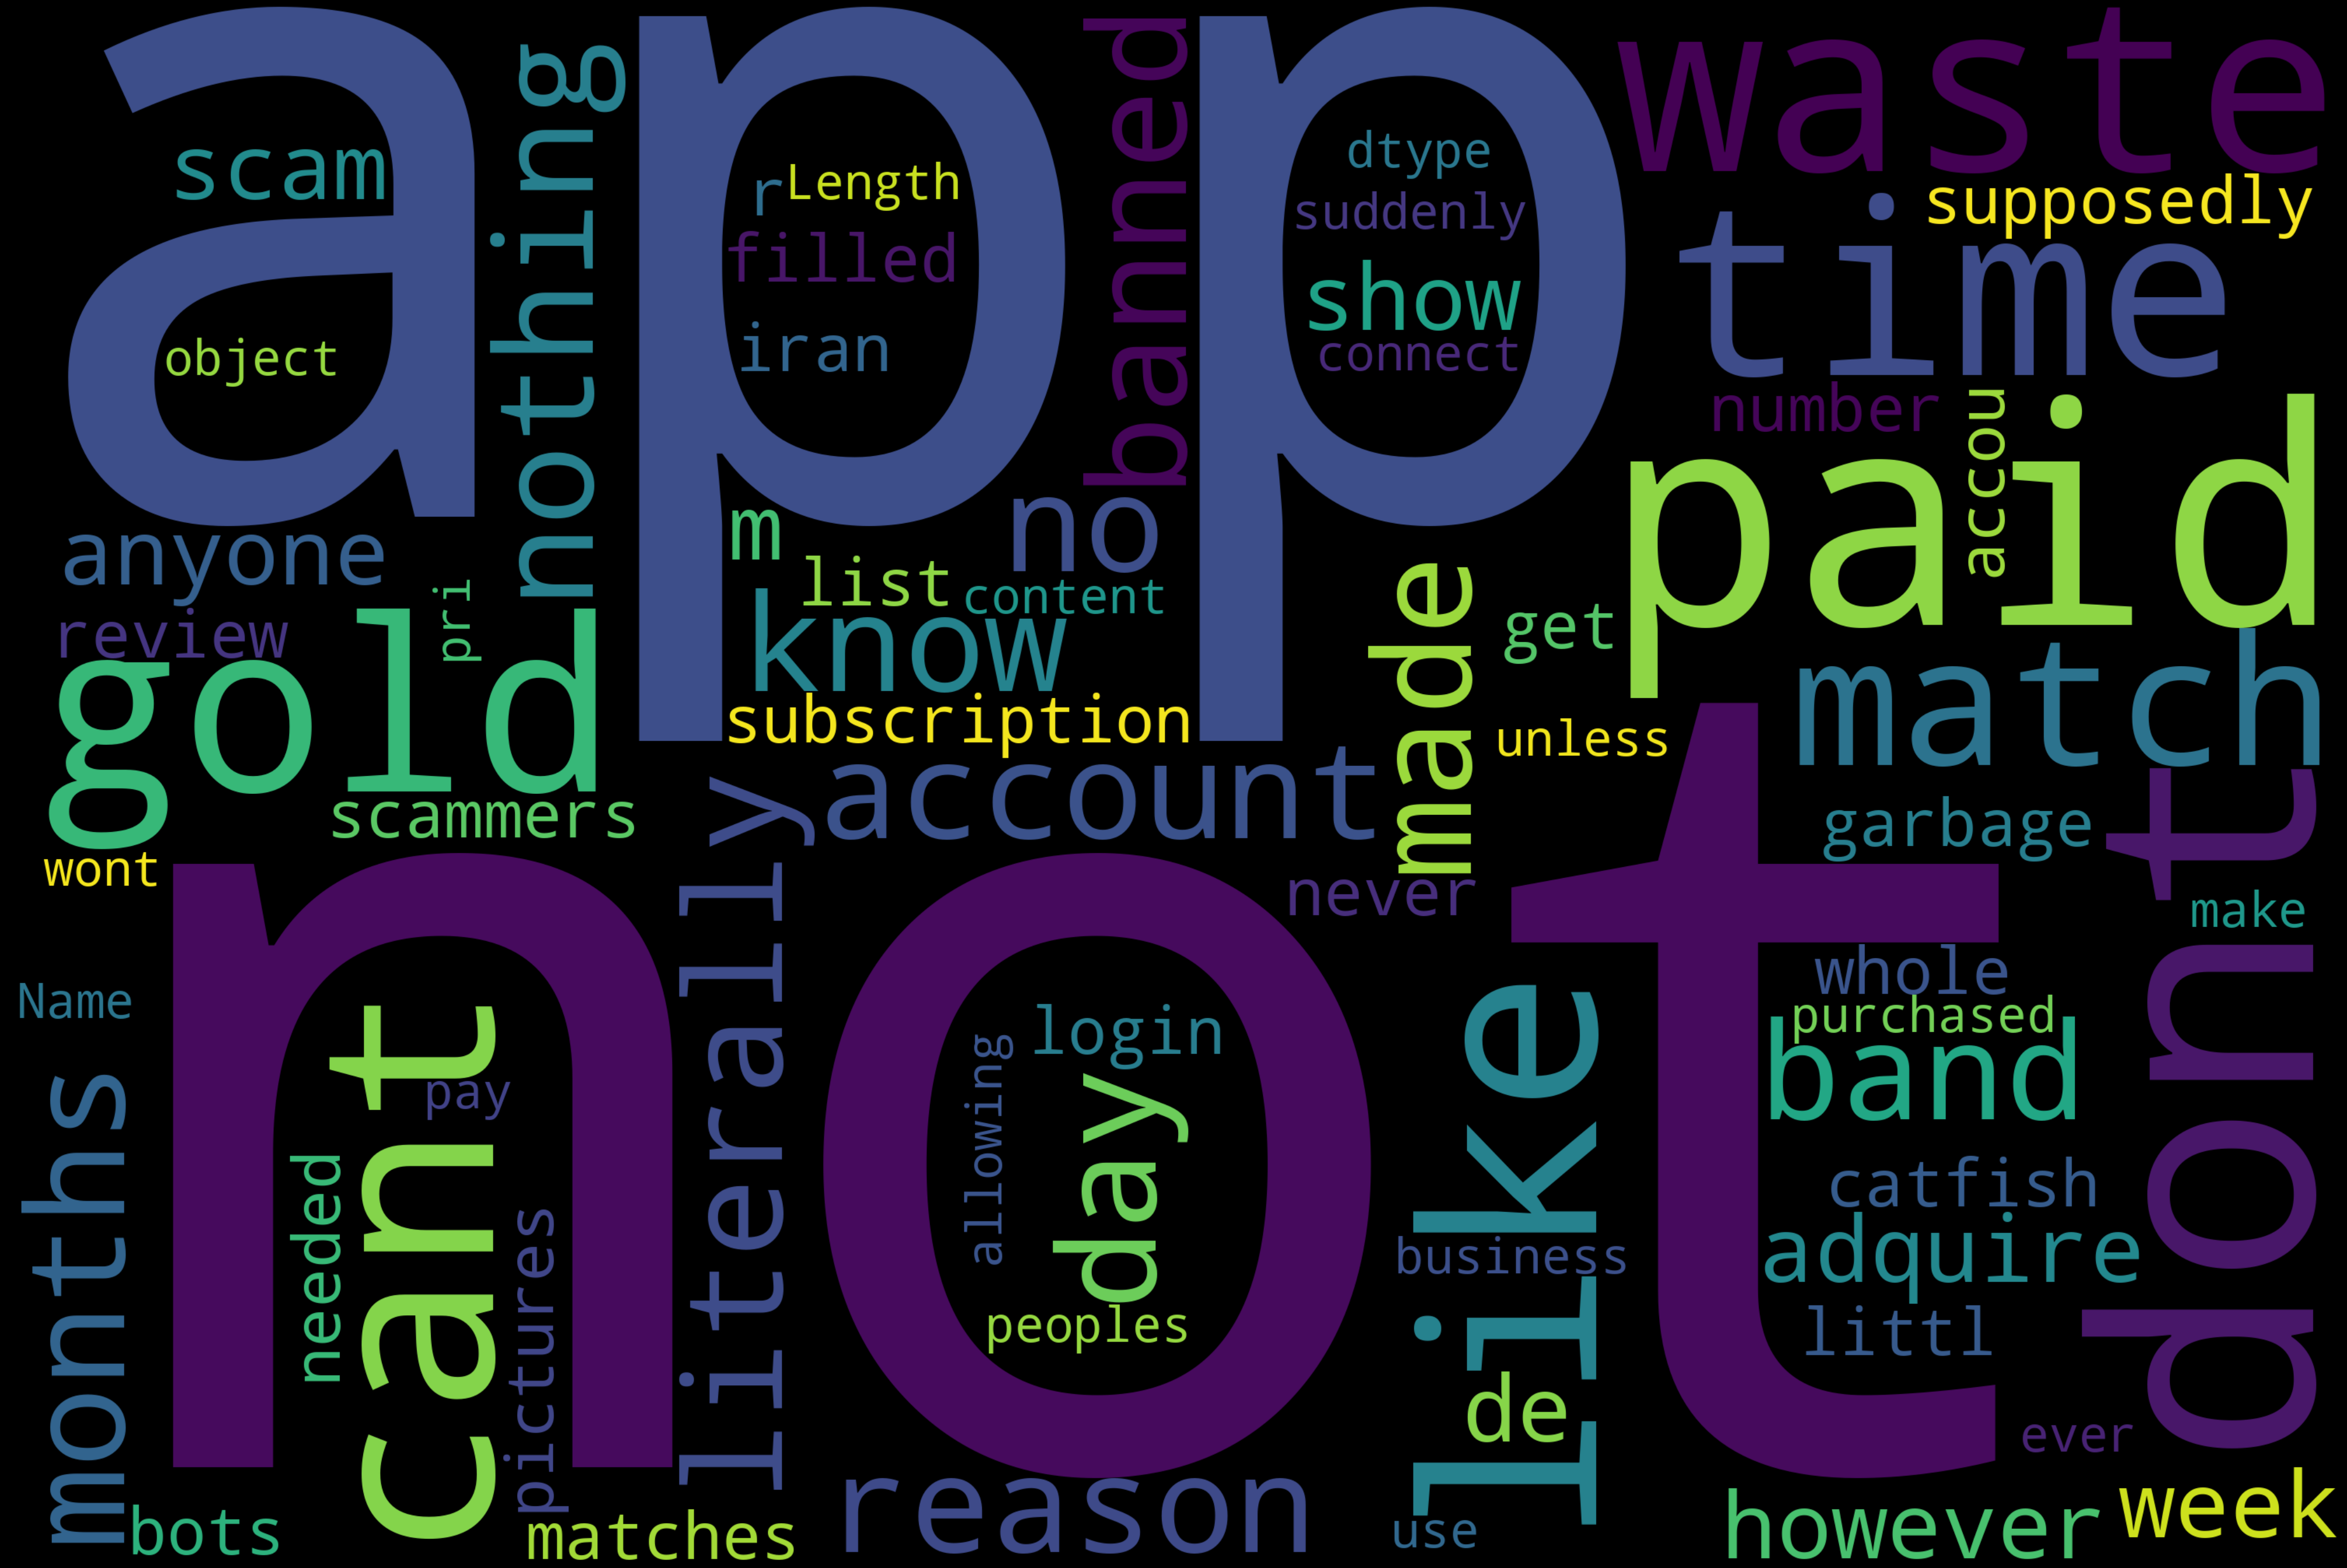

In [ ]:
text = df_neg["content"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'sentiment'.
df['sentiment']= label_encoder.fit_transform(df['sentiment'])

df['sentiment'].unique()

array([0, 2, 1])

In [ ]:
df['sentiment'].value_counts()

0    203
2     50
1     10
Name: sentiment, dtype: int64

In [ ]:
#Extracting 'content' for processing
content_features=df.copy()
content_features=content_features[['content']].reset_index(drop=True)
content_features.head()

content
0  literally made account band no reason nothing ...
1    app paid months day banned dont know waste time
2  adquire gold however not like anyone show de m...
3                       discreet lot beautiful girls
4  scam paid week subscription whole supposedly r...

In [ ]:
#Performing stemming on the content dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(content_features)):
    content = re.sub('[^a-zA-Z]', ' ', content_features['content'][i])
    content = content.split()
    content = [ps.stem(word) for word in content if not word in stop_words]
    content = ' '.join(content)
    corpus.append(content)
corpus[3]

'discreet lot beauti girl'

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(content_features['content'])
X.shape


(263, 3128)

In [ ]:
#Getting the target variable(encoded)
y=df['sentiment']
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({0: 203, 2: 50, 1: 10})
Resampled dataset shape Counter({0: 203, 2: 203, 1: 203})


In [ ]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.7948717948717949
Decision Tree Test Accuracy: 0.42948717948717946
KNN Test Accuracy: 0.25313390313390316
SVC Test Accuracy: 0.8253561253561253
Naive Bayes Test Accuracy: 0.6462962962962964


In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=0.5689866029018293, random_state=0)
The mean accuracy of the model is: 0.934640522875817


Confusion matrix, without normalization


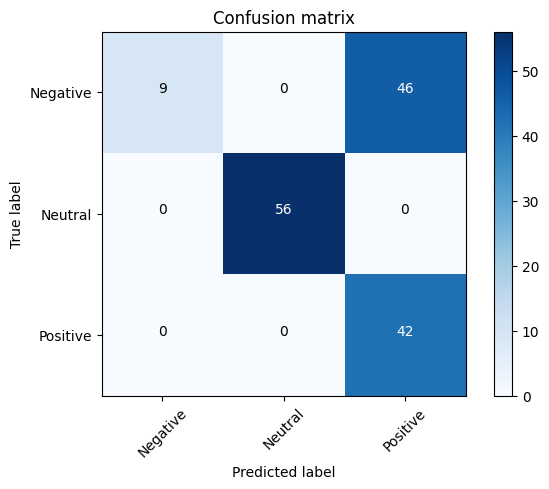

In [ ]:
logreg = LogisticRegression(C=10000.0, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])

In [ ]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.16      0.28        55
           1       1.00      1.00      1.00        56
           2       0.48      1.00      0.65        42

    accuracy                           0.70       153
   macro avg       0.83      0.72      0.64       153
weighted avg       0.86      0.70      0.64       153

